In [1]:
# import head
from nbodykit.lab import *
from nbodykit import style, setup_logging
import matplotlib.pyplot as plt
plt.style.use(style.notebook)
import gc
# import numpy as np
# import nbodykit as nb

In [2]:
import momentum as m

In [3]:
#强制重载
import importlib
importlib.reload(m)

<module 'momentum' from '/Raid6/1/TeamYZ/xiting/momentum/momentum.py'>

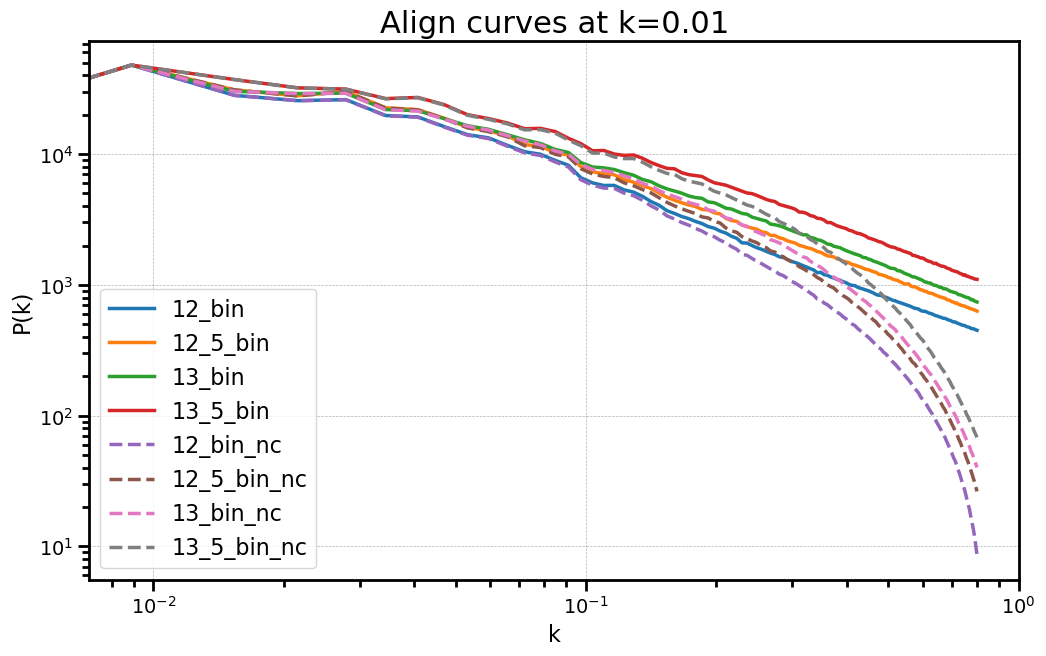

In [4]:
import numpy as np

for num in ['12_bin', '12_5_bin', '13_bin', '13_5_bin']:
    # plt.figure()
    #无weight部分
    #读数据
    cat_nw = m.data_read(num)
    #加红移
    cat_nw = m.RED(cat_nw)
    #计算矩阵
    r01_nw, P01_nw = m.momentum_00(cat_nw, num)

    r01_nw_nc , P01_nw_nc = m.momentum_00_nocompensate(cat_nw, num)
    if num == '12_bin' : 
        k1 = r01_nw.power['k']
        P1 = P01_nw
        k1_nc = r01_nw_nc.power['k']
        P1_nc = P01_nw_nc
    elif num == '12_5_bin' : 
        k2 = r01_nw.power['k']
        P2 = P01_nw
        k2_nc = r01_nw_nc.power['k']
        P2_nc = P01_nw_nc
    elif num == '13_bin' :
        k3 = r01_nw.power['k']
        P3 = P01_nw   
        k3_nc = r01_nw_nc.power['k']
        P3_nc = P01_nw_nc
    elif num == '13_5_bin' :
        k4 = r01_nw.power['k']
        P4 = P01_nw  
        k4_nc = r01_nw_nc.power['k']
        P4_nc = P01_nw_nc      


lines = [
    ('12_bin',     k1,     P1),
    ('12_5_bin',   k2,     P2),
    ('13_bin',     k3,     P3),
    ('13_5_bin',   k4,     P4),
    ('12_bin_nc',  k1_nc,  P1_nc),
    ('12_5_bin_nc',k2_nc,  P2_nc),
    ('13_bin_nc',  k3_nc,  P3_nc),
    ('13_5_bin_nc',k4_nc,  P4_nc),
]


target_k = 0.01

_, k_ref, P_ref = lines[0]
idx_ref = np.argmin(np.abs(k_ref - target_k))
P_ref_value = P_ref[idx_ref]

plt.figure()
for name, k_arr, P_arr in lines:
    idx = np.argmin(np.abs(k_arr - target_k))
    factor = P_ref_value / P_arr[idx]
    P_aligned = P_arr * factor
    ls = '--' if 'nc' in name else '-'
    plt.loglog(k_arr, P_aligned, linestyle=ls, label=name)

# for i, (k_i, P_i) in enumerate(lines):
#     idx_i = np.argmin(np.abs(k_i - target_k))
#     P_i_value = P_i[idx_i]
#     factor = P_ref_value / P_i_value
#     P_i_aligned = P_i * factor
#     plt.loglog(k_i, P_i_aligned, label=f'Line {i+1} aligned')




plt.xlabel('k')
plt.ylabel('P(k)')
plt.title('Align curves at k=0.01')
plt.legend()
plt.show()